In [1]:
import random
import matplotlib.pyplot as plt
import statistics as st
import math

In [2]:
%matplotlib inline

Let's simulate some die rolls. We're going to see the chance of rolling 12 or higher on _n_ dice.

It's important to note here that anything we simulate with random numbers could be calculated. Simulation is very helpful, though, when the amount of variables make calculation difficult.

In [3]:
def roll_die():
    return random.randint(1, 6)

def roll_n_dice(n=1):
    return sum(roll_die() for _ in range(n))

In [4]:
roll_n_dice(3)

12

In [5]:
def trial_roll(target, num_dice, num_trials=1000):
    rolls = [roll_n_dice(num_dice) for _ in range(num_trials)]
    successes = len([roll for roll in rolls if roll >= target])
    return successes / num_trials

print("Chance on 2 dice:", trial_roll(12, 2))
print("Chance on 3 dice:", trial_roll(12, 3))
print("Chance on 4 dice:", trial_roll(12, 4))
print("Chance on 5 dice:", trial_roll(12, 5))

Chance on 2 dice: 0.043
Chance on 3 dice: 0.377
Chance on 4 dice: 0.767
Chance on 5 dice: 0.944


In [6]:
print("Chance on 2 dice:", trial_roll(12, 2))
print("Chance on 3 dice:", trial_roll(12, 3))
print("Chance on 4 dice:", trial_roll(12, 4))
print("Chance on 5 dice:", trial_roll(12, 5))

Chance on 2 dice: 0.026
Chance on 3 dice: 0.383
Chance on 4 dice: 0.766
Chance on 5 dice: 0.949


In [7]:
print("Chance on 2 dice:", trial_roll(12, 2, 100000))
print("Chance on 3 dice:", trial_roll(12, 3, 100000))
print("Chance on 4 dice:", trial_roll(12, 4, 100000))
print("Chance on 5 dice:", trial_roll(12, 5, 100000))

Chance on 2 dice: 0.02745
Chance on 3 dice: 0.37425
Chance on 4 dice: 0.75808
Chance on 5 dice: 0.94098


Every Friday, you go to the ATM to deposit checks. There's a lot of people who do this and so the line can be long -- an average of 3 people, but as many as 6 or as few as 0. Each person in front of you in line takes about 2 minutes, but they sometimes take as long as 5 minutes and never take less than 1 minute. You need to know how long of a wait to expect.

I'm using a normal distribution for the number of customers and their wait times, but am putting a lower limit on each. The number of customers is a normal distribution with $\mu$ of 3 and $\sigma$ of 1, but always an integer and never less than 0, and the time for each customer is a normal distribution with $\mu$ of 2 minutes and $\sigma$ of 1 minute, but never less than 1 minute.

In [8]:
num_customers = lambda: max(0, int(random.gauss(3, 1)))
time_at_atm = lambda: max(1, random.gauss(2, 1))

def sample_atm_time():
    return sum(time_at_atm() for _ in range(num_customers()))

In [9]:
def atm_trials(num_trials=1000):
    return [sample_atm_time() for _ in range(num_trials)]

In [10]:
trials = atm_trials()

In [11]:
st.mean(trials)

5.278517023139442

In [12]:
st.pstdev(trials)

2.5962045702074046

From this, it looks like you'll wait on average about 5 or 5.5 minutes, and $\frac{2}{3}$ of the time, you'll be done in 8 minutes or less. 99% of the time, you'll be done in 13 minutes or less.

Let's look at a histogram of the wait times.

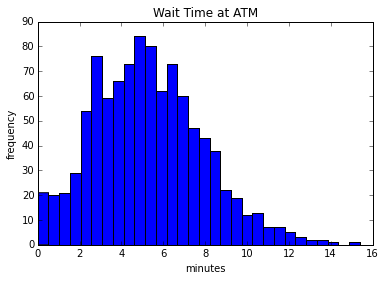

In [13]:
plt.hist(trials, bins=30)
plt.xlabel("minutes")
plt.ylabel("frequency")
plt.title("Wait Time at ATM")
plt.show()